In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Generate dataset: Advertising spend vs. sales
np.random.seed(42)  # For reproducibility

# Generate normal data
advertising = np.random.rand(48) * 100  # Independent variable
sales = 3 * advertising + np.random.normal(size=48, scale=10)  # Dependent variable

In [3]:
# Introduce an outlier (large residual, near center of x-values)
advertising = np.append(advertising, [50])  # Near the center of x
sales = np.append(sales, [500])  # Very high y value (outlier)

In [4]:
# Introduce an influential point (high leverage, near regression line)
advertising = np.append(advertising, [200])  # Extreme x value
sales = np.append(sales, [400])  # Close to the regression line

In [5]:
# Create the DataFrame
data = pd.DataFrame({'Advertising': advertising, 'Sales': sales})

# Display the first few rows
print(data.head())

# Check data informat
print(data.info())

   Advertising       Sales
0    37.454012   99.080175
1    95.071431  287.182904
2    73.199394  226.982848
3    59.865848  181.311228
4    15.601864   45.649109
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Advertising  50 non-null     float64
 1   Sales        50 non-null     float64
dtypes: float64(2)
memory usage: 932.0 bytes
None


In [6]:
# Define independent and dependent variables
X = sm.add_constant(data['Advertising'])  # Add constant for intercept
y = data['Sales']

# Check dimensions
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (50, 2)
y shape: (50,)


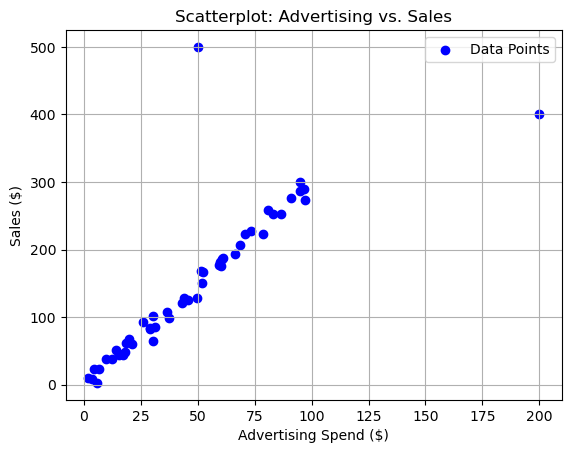

In [7]:
# Create scatterplot
plt.scatter(data['Advertising'], data['Sales'], color='blue', label='Data Points')
plt.title('Scatterplot: Advertising vs. Sales')
plt.xlabel('Advertising Spend ($)')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Fit the regression model
model = sm.OLS(y, X).fit()

In [9]:
# Compute regression line
y_pred = model.predict(X)

In [10]:
# Calculate correlation coefficient (r)
r = np.corrcoef(data['Advertising'], data['Sales'])[0, 1]

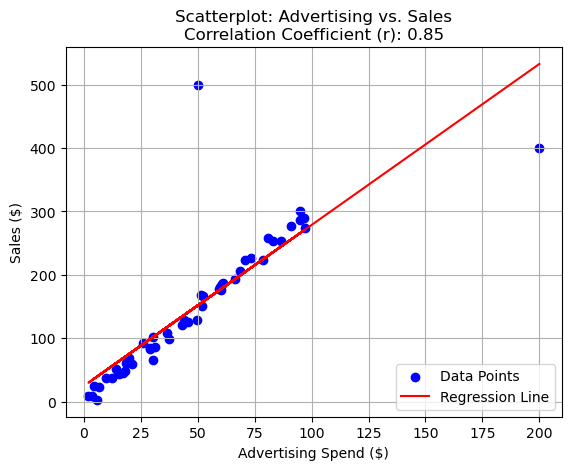

In [11]:
# Scatterplot with regression line and r value
plt.scatter(data['Advertising'], data['Sales'], color='blue', label='Data Points')
plt.plot(data['Advertising'], y_pred, color='red', label='Regression Line')
plt.title(f'Scatterplot: Advertising vs. Sales\nCorrelation Coefficient (r): {r:.2f}')
plt.xlabel('Advertising Spend ($)')
plt.ylabel('Sales ($)')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Print the regression line equation
b0 = model.params['const']
b1 = model.params['Advertising']
print(f"Regression Line: y = {b0:.2f} + {b1:.2f}x")

Regression Line: y = 24.58 + 2.54x


In [13]:
# Compute R-squared
r_squared = model.rsquared
print(f"R-squared: {r_squared:.2f}")

R-squared: 0.73


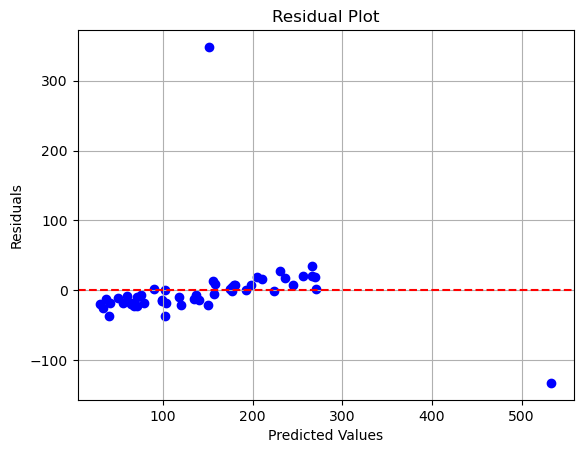

In [14]:
# Extract residuals
residuals = model.resid

# Create a residual plot
plt.scatter(model.fittedvalues, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

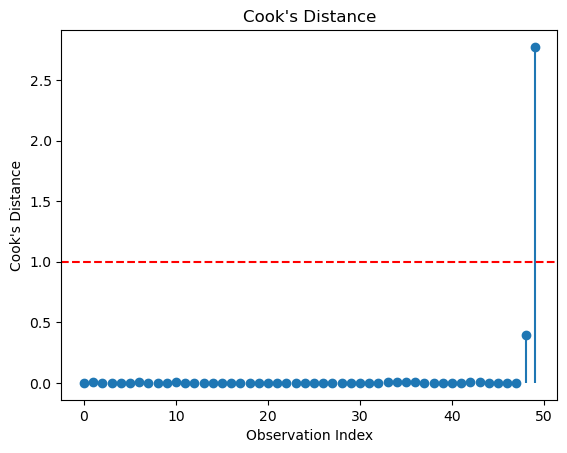

High influence points: [49]


In [15]:
# Compute Cook's Distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Cook's Distance
plt.stem(np.arange(len(cooks_d)), cooks_d, basefmt=" ")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.axhline(1, color='red', linestyle='--')  # Threshold line
plt.show()

# Print observations with high Cook's Distance
high_influence_points = np.where(cooks_d > 1)[0]
print(f"High influence points: {high_influence_points}")

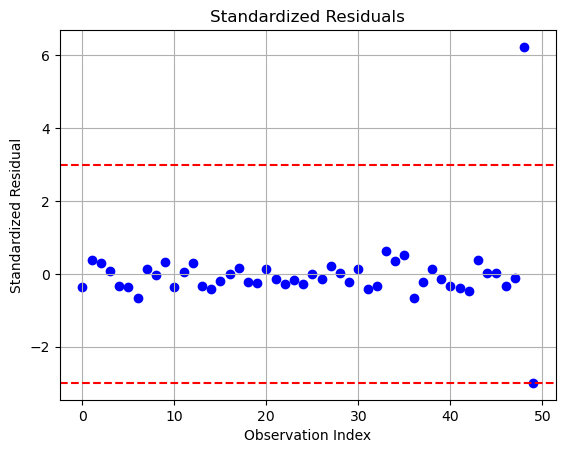

Potential outliers: [48]


In [16]:
# Extract standardized residuals
standardized_residuals = influence.resid_studentized_internal

# Plot standardized residuals
plt.scatter(np.arange(len(standardized_residuals)), standardized_residuals, color='blue')
plt.axhline(3, color='red', linestyle='--')  # Upper threshold
plt.axhline(-3, color='red', linestyle='--')  # Lower threshold
plt.title('Standardized Residuals')
plt.xlabel('Observation Index')
plt.ylabel('Standardized Residual')
plt.grid(True)
plt.show()

# Print potential outliers
outliers = np.where((standardized_residuals > 3) | (standardized_residuals < -3))[0]
print(f"Potential outliers: {outliers}")